In [1]:
import os, math, cv2, dlib, warnings, itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image

from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split

from util import *
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
# Data import for Task A1 and A2
sample_size = 5000 # Full dataset import
landmark_features_celeba, gender_labels, smiling_labels = extract_features_labels_from_celeba(sample_size, testset=False)
landmark_features_celeba_test, gender_labels_test, smiling_labels_test = extract_features_labels_from_celeba(sample_size, testset=True)

# Tuning hyper-parameters for precision

Best parameters set found on training dataset:

{'C': 0.01, 'kernel': 'linear'}

Grid scores on training dataset:

0.253 (+/-0.001) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.253 (+/-0.001) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.253 (+/-0.001) for {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.253 (+/-0.001) for {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
0.773 (+/-0.031) for {'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}
0.253 (+/-0.001) for {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
0.253 (+/-0.001) for {'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}
0.253 (+/-0.001) for {'C': 0.5, 'gamma': 10, 'kernel': 'rbf'}
0.253 (+/-0.001) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.253 (+/-0.001) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.253 (+/-0.001) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.253 (+/-0.001) for {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.809 (+/-0.024) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.253 (+/-0.001) for {'C': 1

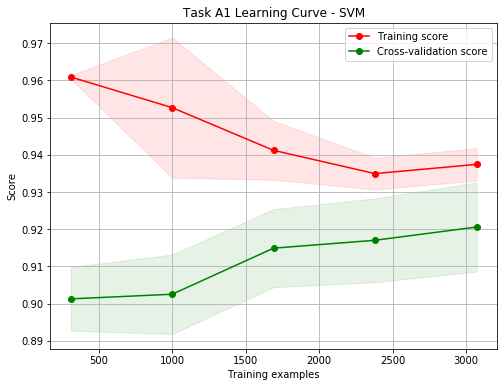

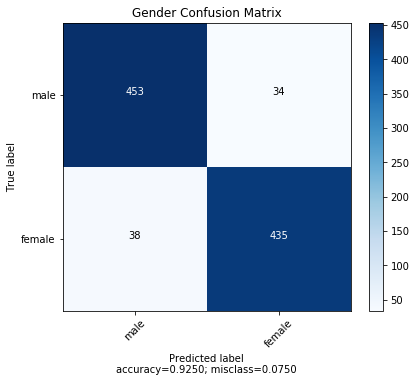

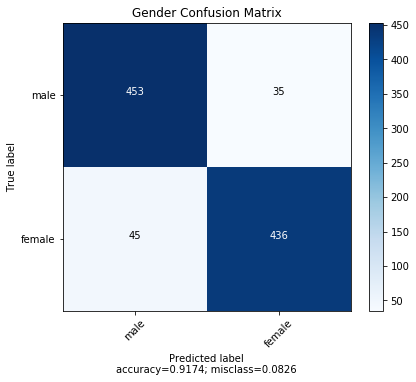

In [3]:
# Task A1 - Gender Recognition
# Initialisation parameters
split_percentage = 80 # 80% training data - 20% testing data split
feature_type = 'landmarks' # Feature extraction type
cv_folds = 5 # Number of cross-validation folds (k)

# Train and test the model with optimised hyper-parameters
X_all, X_train, X_test, y_all, y_train, y_test = data_preprocessing(landmark_features_celeba, gender_labels, split_percentage, feature_type)
model_A1, acc_A1_train, acc_A1_test, cm_A1 = build_model_task_A1(X_train, X_test, y_train, y_test)
acc_A1_val = cross_val_score(model_A1, X_all, y_all, scoring = 'accuracy', cv=cv_folds).mean()

# Test the model over new test dataset
X_test_new, y_test_new = data_preprocessing_testset(landmark_features_celeba_test, gender_labels_test, feature_type)
y_true, y_pred = y_test_new, model_A1.predict(X_test_new)
acc_A1_test_new = accuracy_score(y_test_new, y_pred)

# Print results
print('TA1:{},{},{};'.format(acc_A1_train, acc_A1_val, acc_A1_test))
print('TA1 on new test dataset:{}'.format(acc_A1_test_new))

# Uncomment code below to see additional results
"""
# Train and optimise model with exhaustive grid search
model_A1, acc_A1_train, acc_A1_test, cm_A1 = build_svm_gridcv(X_train, X_test, y_train, y_test, cv_folds)

# Plot learning curve with k-fold cross validation
task_A1_plot, acc_A1_val = plot_learning_curve(model_A1, 'Task A1 Learning Curve - SVM', X_train, y_train, ylim=None, cv=cv_folds,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))
                        
# Plot confusion matrix on train/test split dataset
plot_confusion_matrix(cm_A1, target_names = ['male', 'female'], title = 'Gender Confusion Matrix', cmap=plt.cm.Blues, normalize=False)

# Plot confusion matrix on new test dataset
cm_A1_test_new = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm_A1_test_new, target_names = ['male', 'female'], title = 'Gender Confusion Matrix on New Test Dataset', cmap=plt.cm.Blues, normalize=False)
"""

# Tuning hyper-parameters for precision

Best parameters set found on training dataset:

{'C': 0.5, 'kernel': 'poly'}

Grid scores on training dataset:

0.254 (+/-0.001) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.254 (+/-0.001) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.254 (+/-0.001) for {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.254 (+/-0.001) for {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
0.765 (+/-0.022) for {'C': 0.5, 'gamma': 0.01, 'kernel': 'rbf'}
0.254 (+/-0.001) for {'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
0.254 (+/-0.001) for {'C': 0.5, 'gamma': 1, 'kernel': 'rbf'}
0.254 (+/-0.001) for {'C': 0.5, 'gamma': 10, 'kernel': 'rbf'}
0.254 (+/-0.001) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.254 (+/-0.001) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.254 (+/-0.001) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.254 (+/-0.001) for {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.853 (+/-0.015) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.254 (+/-0.001) for {'C': 1, '

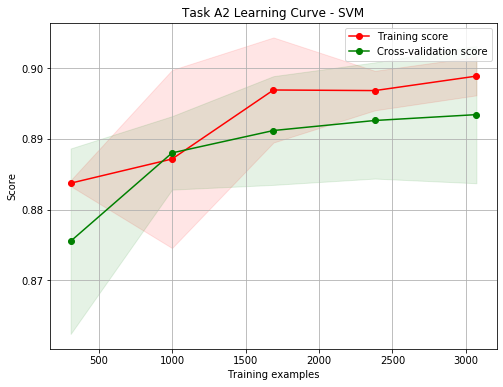

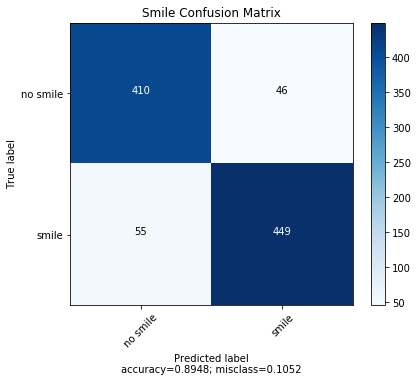

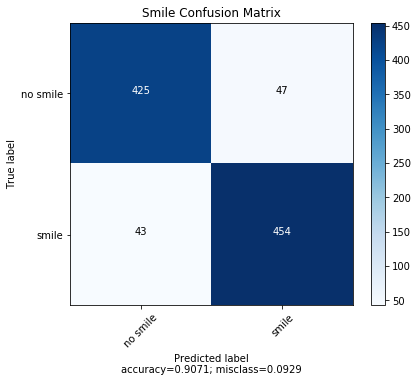

In [4]:
# Task A2 - Smiling Recognition
# Initialisation parameters
split_percentage = 80 # 80% training data - 20% testing data split
feature_type = 'landmarks' # Feature extraction type
cv_folds = 5 # Number of cross-validation folds (k)

# Train and test the model with pre-defined optimised hyper-parameters
X_all, X_train, X_test, y_all, y_train, y_test = data_preprocessing(landmark_features_celeba, smiling_labels, split_percentage, feature_type)
model_A2, acc_A2_train, acc_A2_test, cm_A2 = build_model_task_A2(X_train, X_test, y_train, y_test)
acc_A2_val = cross_val_score(model_A2, X_all, y_all, scoring = 'accuracy', cv=cv_folds).mean()

# Test the model over new test dataset
X_test_new, y_test_new = data_preprocessing_testset(landmark_features_celeba_test, smiling_labels_test, feature_type)
y_true, y_pred = y_test_new, model_A2.predict(X_test_new)
acc_A2_test_new = accuracy_score(y_test_new, y_pred)

# Print results
print('TA2:{},{},{};'.format(acc_A2_train, acc_A2_val, acc_A2_test))
print('TA2 on new test dataset:{}'.format(acc_A2_test_new))

# Uncomment code below to see additional results
"""
# Train and optimise model with exhaustive grid search
model_A2, acc_A2_train, acc_A2_test, cm_A2 = build_svm_gridcv(X_train, X_test, y_train, y_test, cv_folds)

# Plot learning curve with k-fold cross validation
task_A2_plot, acc_A2_val = plot_learning_curve(model_A2, 'Task A2 Learning Curve - SVM', X_train, y_train, ylim=None, cv=cv_folds,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))
                        
# Plot confusion matrix on train/test split dataset
plot_confusion_matrix(cm_A2, target_names = ['no smile', 'smile'], title = 'Smile Confusion Matrix', cmap=plt.cm.Blues, normalize=False)

# Plot confusion matrix on new test dataset
cm_A2_test_new = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm_A2_test_new, target_names = ['no smile', 'smile'], title = 'Smile Confusion Matrix on New Test Dataset', cmap=plt.cm.Blues, normalize=False)
"""

TB2 new test data:0.7478081485301702
TB2:0.7698336532309661,0.7478081485301702,0.7332053742802304;


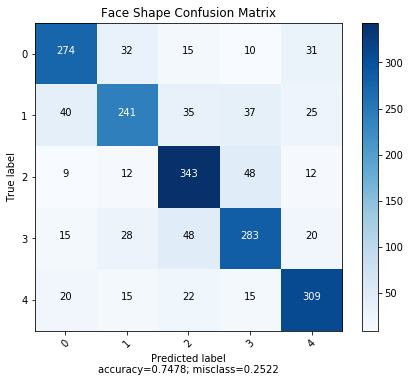

In [9]:
# Data import for Task B1
feature_type = 'rgb' # Feature extraction type
sample_size = 4000 
img_features_cartoon_set, eye_color_labels, _ = extract_features_labels_from_cartoon_set(feature_type, sample_size, testset=False)
img_features_cartoon_set_test, eye_color_labels_test, _ = extract_features_labels_from_cartoon_set(feature_type, sample_size, testset=True)

TB1 new test data:0.8256
TB1:0.8640625,0.8256,0.81125;


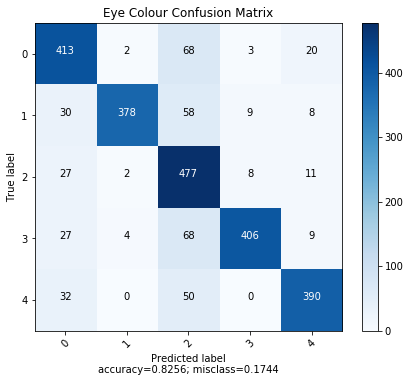

In [10]:
# Task B1 - Eye Colour Recognition
# Initialisation parameters
split_percentage = 80 # 80% training data - 20% testing data split
feature_type = 'rgb' # Feature extraction type
cv_folds = 5 # Number of cross-validation folds (k)

# Train and test the model with pre-defined optimised hyper-parameters
X_all, X_train, X_test, y_all, y_train, y_test = data_preprocessing(img_features_cartoon_set, eye_color_labels, split_percentage, feature_type)
model_B1, acc_B1_train, acc_B1_test, cm_B1 = build_model_task_B1(X_train, X_test, y_train, y_test)
acc_B1_val = cross_val_score(model_B1, X_all, y_all, scoring = 'accuracy', cv=cv_folds).mean()

# Test the model over new test dataset
X_test_new, y_test_new = data_preprocessing_testset(img_features_cartoon_set_test, eye_color_labels_test, feature_type)
y_true, y_pred = y_test_new, model_B1.predict(X_test_new)
acc_B1_test_new = accuracy_score(y_test_new, y_pred)

# Print results
print('TB1:{},{},{};'.format(acc_B1_train, acc_B1_val, acc_B1_test))
print('TB1 on new test dataset:{}'.format(acc_B1_test_new))

# Uncomment code below to see additional results
"""
# Train and optimise model with exhaustive grid search
model_B1, acc_B1_train, acc_B1_test, cm_B1 = build_svm_gridcv(X_train, X_test, y_train, y_test, cv_folds)

# Plot learning curve with k-fold cross validation
task_B1_plot, acc_B1_val = plot_learning_curve(model_B1, 'Task B1 Learning Curve - SVM', X_train, y_train, ylim=None, cv=cv_folds,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))
                        
# Plot confusion matrix on train/test split dataset
plot_confusion_matrix(cm_B1, target_names = ['0', '1', '2', '3', '4'], title = 'Eye Colour Confusion Matrix', cmap=plt.cm.Blues, normalize=False)

# Plot confusion matrix on new test dataset
cm_B1_test_new = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm_B1_test_new, target_names = ['0', '1', '2', '3', '4'], title = 'Eye Colour Confusion Matrix on New Test Dataset', cmap=plt.cm.Blues, normalize=False)
"""

In [ ]:
# Data import for Task B2
feature_type = 'landmarks' # Feature extraction type
sample_size = 10000 # Full dataset import  
img_features_cartoon_set, _, face_shape_labels = extract_features_labels_from_cartoon_set(feature_type, sample_size, testset=False)
img_features_cartoon_set_test, _, face_shape_labels_test = extract_features_labels_from_cartoon_set(feature_type, sample_size, testset=True)

In [ ]:
# Task B2 - Face Shape Recognition
# Initialisation parameters
split_percentage = 80 # 80% training data - 20% testing data split
feature_type = 'landmarks' # Feature extraction type
cv_folds = 5 # Number of cross-validation folds (k)

# Train and test the model with pre-defined optimised hyper-parameters
X_all, X_train, X_test, y_all, y_train, y_test = data_preprocessing(img_features_cartoon_set, face_shape_labels, split_percentage, feature_type)
model_B2, acc_B2_train, acc_B2_test, cm_B2 = build_model_task_B2(X_train, X_test, y_train, y_test)
acc_B2_val = cross_val_score(model_B2, X_all, y_all, scoring = 'accuracy', cv=cv_folds).mean()

# Test the model over new test dataset
X_test_new, y_test_new = data_preprocessing_testset(img_features_cartoon_set_test, face_shape_labels_test, feature_type)
y_true, y_pred = y_test_new, model_B2.predict(X_test_new)
acc_B2_test_new = accuracy_score(y_test_new, y_pred)

# Print results
print('TB2:{},{},{};'.format(acc_B2_train, acc_B2_val, acc_B2_test))
print('TB2 on new test dataset:{}'.format(acc_B2_test_new))

# Uncomment code below to see additional results
"""
# Train and optimise model with exhaustive grid search
model_B2, acc_B2_train, acc_B2_test, cm_B2 = build_svm_gridcv(X_train, X_test, y_train, y_test, cv_folds)

# Plot learning curve with k-fold cross validation
task_B2_plot, acc_B2_val = plot_learning_curve(model_B2, 'Task B2 Learning Curve - SVM', X_train, y_train, ylim=None, cv=cv_folds,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5))
                        
# Plot confusion matrix on train/test split dataset
plot_confusion_matrix(cm_B2, target_names = ['0', '1', '2', '3', '4'], title = 'Face Shape Confusion Matrix', cmap=plt.cm.Blues, normalize=False)

# Plot confusion matrix on new test dataset
cm_B2_test_new = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm_B2_test_new, target_names = ['0', '1', '2', '3', '4'], title = 'Face Shape Confusion Matrix on New Test Dataset', cmap=plt.cm.Blues, normalize=False)
"""

In [ ]:
# Print out your results with following format:
print('TA1:{},{},{};TA2:{},{},{};TB1:{},{},{};TB2:{},{},{};'.format(acc_A1_train, acc_A1_val, acc_A1_test,
                                                                    acc_A2_train, acc_A2_val, acc_A2_test,
                                                                    acc_B1_train, acc_B1_val, acc_B1_test,
                                                                    acc_B2_train, acc_B2_val, acc_B2_test))